# DESeq2 in python
##### Sumeed Manzoor<br>University of Michigan Medical School

This is a walkthrough of the pydeseq2 docs + some visualization work. I did not have time to write out each step, so I included links in comments throughout the code where you can read more details for any particular process.

In [215]:
# https://github.com/owkin/PyDESeq2
# https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html#sphx-glr-auto-examples-plot-minimal-pydeseq2-pipeline-py

In [5]:
import os
import pickle as pkl

In [6]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [7]:
SAVE = False  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be
    # saved
    OUTPUT_PATH = "../output_files/synthetic_example"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

In [8]:
counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

In [9]:
counts_df

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5
...,...,...,...,...,...,...,...,...,...,...
sample96,7,26,3,67,11,4,41,44,54,1
sample97,1,14,3,71,33,5,19,42,25,4
sample98,10,36,2,72,11,2,66,27,16,9
sample99,18,14,3,66,53,11,32,19,79,11


In [10]:
metadata

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X
...,...,...
sample96,B,Y
sample97,B,X
sample98,B,Y
sample99,B,X


## Read counts modeling

In [11]:
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    n_cpus=8,
)

In [12]:
dds.fit_size_factors()
dds.obsm["size_factors"]

Fitting size factors...
... done in 0.00 seconds.



array([1.22898094, 1.18877375, 0.99722229, 1.00215773, 0.83457743,
       1.10730382, 0.8999001 , 1.15343785, 0.68163849, 1.29764537,
       1.04491511, 1.45930946, 1.14588441, 0.8049275 , 0.88402672,
       0.88402672, 1.32879767, 0.82564657, 1.5978062 , 1.29764537,
       1.31940196, 0.69919197, 1.10697146, 1.10214803, 1.19152118,
       1.0624452 , 0.98548229, 0.76881428, 0.8939601 , 1.27135863,
       1.61101905, 1.55084302, 0.83601298, 0.98213727, 1.27270212,
       1.0510719 , 1.76078144, 1.08132885, 1.50390106, 1.0510719 ,
       0.80280751, 0.70955247, 1.32602392, 0.98031899, 1.1078077 ,
       0.68792508, 0.90429564, 1.56411155, 0.81918767, 1.19364837,
       0.79492024, 1.84963565, 0.79694628, 0.79708276, 0.97287297,
       1.16248554, 1.50489413, 1.41929759, 1.04612122, 1.05720226,
       0.99635345, 1.84224912, 1.03801163, 0.89633874, 0.72952979,
       1.33453944, 0.93968061, 1.14016425, 1.59166589, 1.08554239,
       0.72370261, 0.91558563, 1.14183629, 1.33857618, 0.94450

In [13]:
dds.fit_genewise_dispersions()
dds.varm["genewise_dispersions"]

Fitting dispersions...
... done in 0.01 seconds.



array([0.91013511, 0.21371805, 0.81359443, 0.1613621 , 0.24850424,
       0.97307734, 0.23303023, 0.19810261, 0.18363604, 0.64637486])

In [14]:
dds.fit_dispersion_trend()
dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

Fitting dispersion trend curve...
... done in 0.02 seconds.



array([0.65142791, 0.31300248, 1.04987097, 0.13414632, 0.26400662,
       0.97813348, 0.25676617, 0.20575176, 0.2160277 , 0.50274843])

In [15]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.0559246320431474, sigma_prior=0.25


In [16]:
dds.fit_MAP_dispersions()
dds.varm["MAP_dispersions"]
dds.varm["dispersions"]

Fitting MAP dispersions...
... done in 0.02 seconds.



array([0.88259868, 0.22257863, 0.83723801, 0.15897048, 0.24992589,
       0.97364795, 0.23515487, 0.19878078, 0.1865203 , 0.63189989])

In [17]:
dds.fit_LFC()
dds.varm["LFC"]

Fitting LFCs...
... done in 0.01 seconds.



,intercept,condition_B_vs_A
gene1,1.891436,0.438632
gene2,2.851662,0.373296
gene3,1.787780,-0.438645
gene4,4.741958,-0.285647
gene5,3.077798,0.403457
gene6,1.678536,0.001010
gene7,3.291025,0.093116
gene8,3.785129,-0.187604
gene9,3.682882,-0.147443
gene10,2.300515,0.267562


In [18]:
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

Refitting 0 outliers.



In [19]:
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(dds, f)

## Statistical analysis

In [20]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [21]:
stat_res.run_wald_test()
stat_res.p_values

Running Wald tests...
... done in 0.11 seconds.



gene1     0.028604
gene2     0.000329
gene3     0.032075
gene4     0.000513
gene5     0.000168
gene6     0.996253
gene7     0.370297
gene8     0.047227
gene9     0.110391
gene10    0.114518
dtype: float64

In [22]:
# optional Cooks filtering
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

gene1     0.028604
gene2     0.000329
gene3     0.032075
gene4     0.000513
gene5     0.000168
gene6     0.996253
gene7     0.370297
gene8     0.047227
gene9     0.110391
gene10    0.114518
dtype: float64

In [23]:
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

gene1     0.064150
gene2     0.001646
gene3     0.064150
gene4     0.001710
gene5     0.001646
gene6     0.996253
gene7     0.411441
gene8     0.078711
gene9     0.143148
gene10    0.143148
Name: 0, dtype: float64

In [24]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene1,8.541317,0.632812,0.289101,2.188898,0.028604,0.064150
gene2,21.281239,0.538552,0.149963,3.591235,0.000329,0.001646
gene3,5.010123,-0.632830,0.295236,-2.143475,0.032075,0.064150
gene4,100.517961,-0.412102,0.118629,-3.473867,0.000513,0.001710
gene5,27.142450,0.582065,0.154706,3.762408,0.000168,0.001646
gene6,5.413043,0.001457,0.310311,0.004696,0.996253,0.996253
gene7,28.294023,0.134338,0.149945,0.895917,0.370297,0.411441
gene8,40.358344,-0.270656,0.136401,-1.984260,0.047227,0.078711
gene9,37.166183,-0.212715,0.133243,-1.596437,0.110391,0.143148
gene10,11.589325,0.386011,0.244588,1.578207,0.114518,0.143148


In [25]:
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_results_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(stat_res, f)

In [26]:
stat_res.lfc_shrink(coeff="condition_B_vs_A")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition B vs A


... done in 0.50 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene1,8.541317,0.408253,0.294276,2.188898,0.028604,0.064150
gene2,21.281239,0.480145,0.151201,3.591235,0.000329,0.001646
gene3,5.010123,-0.396066,0.300796,-2.143475,0.032075,0.064150
gene4,100.517961,-0.374191,0.118704,-3.473867,0.000513,0.001710
gene5,27.142450,0.521487,0.156210,3.762408,0.000168,0.001646
gene6,5.413043,0.000716,0.239203,0.004696,0.996253,0.996253
gene7,28.294023,0.103421,0.141496,0.895917,0.370297,0.411441
gene8,40.358344,-0.226288,0.133477,-1.984260,0.047227,0.078711
gene9,37.166183,-0.175746,0.129138,-1.596437,0.110391,0.143148
gene10,11.589325,0.239935,0.231986,1.578207,0.114518,0.143148


In [27]:
if SAVE:
    with open(
        os.path.join(OUTPUT_PATH, "shrunk_stat_results_detailed_pipe.pkl"), "wb"
    ) as f:
        pkl.dump(stat_res, f)

In [28]:
dds.to_df()

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5
...,...,...,...,...,...,...,...,...,...,...
sample96,7,26,3,67,11,4,41,44,54,1
sample97,1,14,3,71,33,5,19,42,25,4
sample98,10,36,2,72,11,2,66,27,16,9
sample99,18,14,3,66,53,11,32,19,79,11


In [29]:
stat_res.results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene1,8.541317,0.408253,0.294276,2.188898,0.028604,0.064150
gene2,21.281239,0.480145,0.151201,3.591235,0.000329,0.001646
gene3,5.010123,-0.396066,0.300796,-2.143475,0.032075,0.064150
gene4,100.517961,-0.374191,0.118704,-3.473867,0.000513,0.001710
gene5,27.142450,0.521487,0.156210,3.762408,0.000168,0.001646
gene6,5.413043,0.000716,0.239203,0.004696,0.996253,0.996253
gene7,28.294023,0.103421,0.141496,0.895917,0.370297,0.411441
gene8,40.358344,-0.226288,0.133477,-1.984260,0.047227,0.078711
gene9,37.166183,-0.175746,0.129138,-1.596437,0.110391,0.143148
gene10,11.589325,0.239935,0.231986,1.578207,0.114518,0.143148


In [30]:
from pydeseq2.preprocessing import deseq2_norm

In [31]:
deseq2_norm(dds.to_df())

(               gene1      gene2      gene3       gene4      gene5      gene6  \
 sample1     9.764187  17.087328   3.254729  105.778695  14.646281   0.000000   
 sample2     0.841203  37.012930   1.682406   52.995786   9.253233   8.412030   
 sample3     4.011142   4.011142  11.030640  180.501381  21.058494   3.008356   
 sample4     0.997847   9.978469   1.995694   99.784691  43.905264   8.980622   
 sample5     1.198211  13.180323   7.189267  161.758508  19.171379   2.396422   
 ...              ...        ...        ...         ...        ...        ...   
 sample96    5.514594  20.482777   2.363397   52.782540   8.665790   3.151196   
 sample97    1.344090  18.817254   4.032269   95.430357  44.354955   6.720448   
 sample98   13.515737  48.656654   2.703147   97.313308  14.867311   2.703147   
 sample99   18.771903  14.600369   3.128651   68.830311  55.272826  11.471719   
 sample100  33.034037  14.157444   4.719148   66.068073  20.449642  20.449642   
 
                gene7     

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

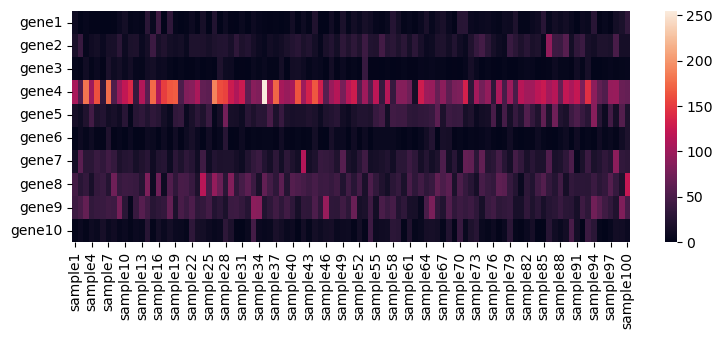

In [56]:
plt.figure(figsize=(9,3))
sns.heatmap(deseq2_norm(dds.to_df())[0].T);

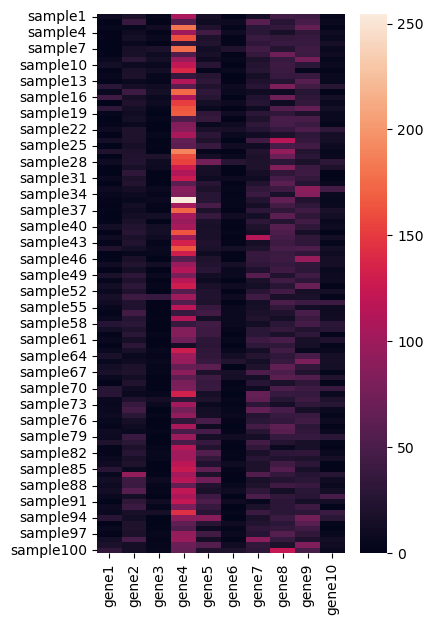

In [50]:
plt.figure(figsize=(4,7))
sns.heatmap(deseq2_norm(dds.to_df())[0]);

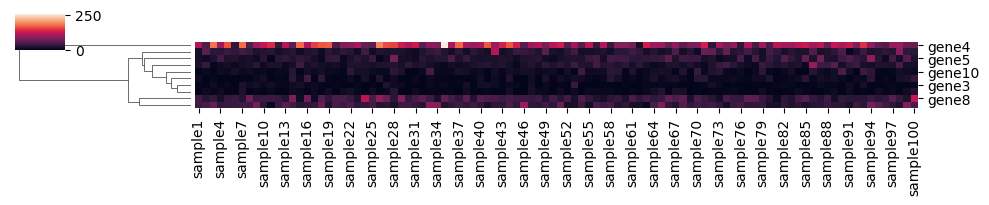

In [105]:
# https://python-charts.com/correlation/clustermap-seaborn/
sns.clustermap(deseq2_norm(dds.to_df())[0].T,
               figsize=(10,2),
               col_cluster=False
              );

In [86]:
samples = metadata['condition'] + metadata['group']

In [87]:
samples

sample1      AX
sample2      AY
sample3      AX
sample4      AY
sample5      AX
             ..
sample96     BY
sample97     BX
sample98     BY
sample99     BX
sample100    BY
Length: 100, dtype: object

In [92]:
samples.unique()

array(['AX', 'AY', 'BX', 'BY'], dtype=object)

In [ ]:
lut = dict(zip(samples.unique(), 'rbgy'))
col_colors = samples.map(lut)

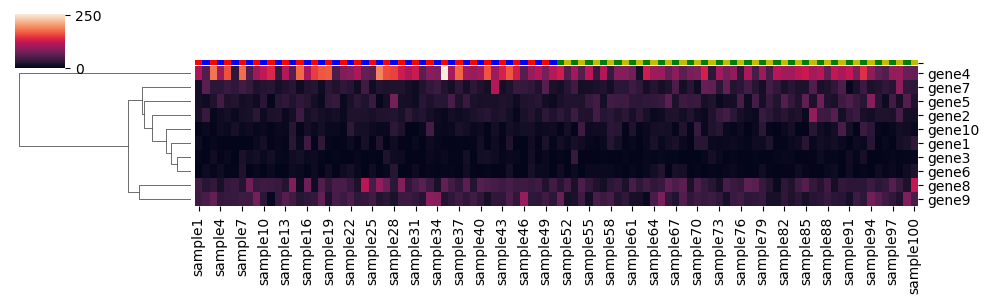

In [106]:
sns.clustermap(deseq2_norm(dds.to_df())[0].T,
               figsize=(10,3),
               col_cluster=False,
               col_colors=col_colors
              );

In [123]:
lut1 = dict(zip(metadata['condition'].unique(), 'rb'))
col_colors1 = metadata['condition'].map(lut1)

In [124]:
lut2 = dict(zip(metadata['group'].unique(), 'gy'))
col_colors2 = metadata['group'].map(lut2)

In [125]:
col_colors = pd.concat([col_colors1, col_colors2], axis=1)

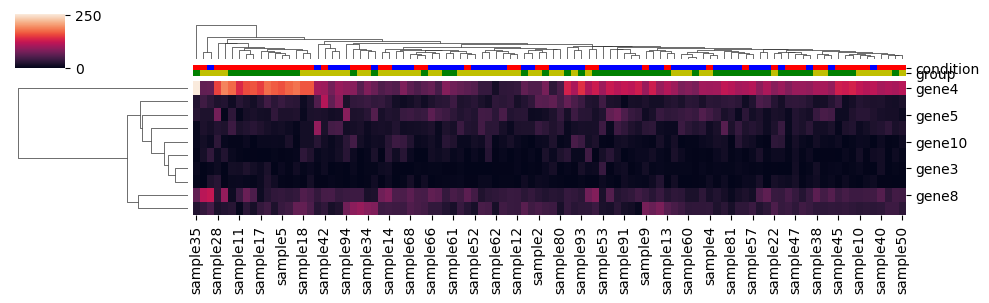

In [132]:
sns.clustermap(deseq2_norm(dds.to_df())[0].T,
               figsize=(10,3),
               col_colors=col_colors
              );

In [ ]:
from matplotlib.patches import Patch

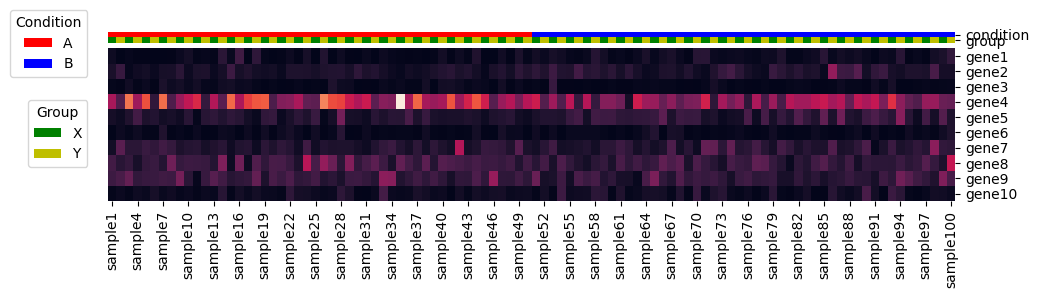

In [163]:
# https://matplotlib.org/3.2.1/tutorials/intermediate/legend_guide.html
ax = sns.clustermap(deseq2_norm(dds.to_df())[0].T,
               figsize=(10,3),
               col_cluster=False,
               row_cluster=False,
               cbar_pos=None,
               dendrogram_ratio=0.05,
               col_colors=col_colors
              );
handles = [Patch(facecolor=lut1[name]) for name in lut1]
first_legend = plt.legend(handles, lut1, title='Condition',
           bbox_to_anchor=(0.05, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
ax = plt.gca().add_artist(first_legend)
handles = [Patch(facecolor=lut2[name]) for name in lut2]
plt.legend(handles, lut2, title='Group',
           bbox_to_anchor=(0.05, 0.7), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

In [185]:
# https://www.youtube.com/watch?v=Lsue2gEM9D0&t=609s&ab_channel=StatQuestwithJoshStarmer
# https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [187]:
metadata['condition']

sample1      A
sample2      A
sample3      A
sample4      A
sample5      A
            ..
sample96     B
sample97     B
sample98     B
sample99     B
sample100    B
Name: condition, Length: 100, dtype: object

In [170]:
scaled_data = preprocessing.scale(deseq2_norm(dds.to_df())[0])
pca = PCA()

In [173]:
pca.fit(scaled_data);

In [175]:
pca_data = pca.transform(scaled_data)

In [177]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

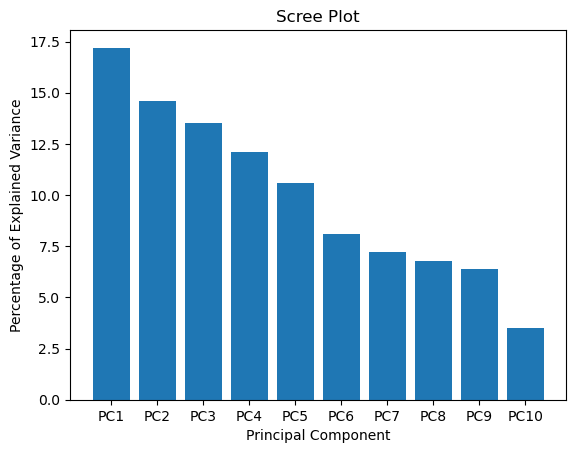

In [178]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [198]:
pca_df = pd.DataFrame(pca_data, index=metadata.index + metadata['condition'], columns=labels)

In [199]:
pca_df.index

Index(['sample1A', 'sample2A', 'sample3A', 'sample4A', 'sample5A', 'sample6A',
       'sample7A', 'sample8A', 'sample9A', 'sample10A', 'sample11A',
       'sample12A', 'sample13A', 'sample14A', 'sample15A', 'sample16A',
       'sample17A', 'sample18A', 'sample19A', 'sample20A', 'sample21A',
       'sample22A', 'sample23A', 'sample24A', 'sample25A', 'sample26A',
       'sample27A', 'sample28A', 'sample29A', 'sample30A', 'sample31A',
       'sample32A', 'sample33A', 'sample34A', 'sample35A', 'sample36A',
       'sample37A', 'sample38A', 'sample39A', 'sample40A', 'sample41A',
       'sample42A', 'sample43A', 'sample44A', 'sample45A', 'sample46A',
       'sample47A', 'sample48A', 'sample49A', 'sample50A', 'sample51B',
       'sample52B', 'sample53B', 'sample54B', 'sample55B', 'sample56B',
       'sample57B', 'sample58B', 'sample59B', 'sample60B', 'sample61B',
       'sample62B', 'sample63B', 'sample64B', 'sample65B', 'sample66B',
       'sample67B', 'sample68B', 'sample69B', 'sample70B', '

In [201]:
samples = metadata['condition'] + metadata['group']
lut = dict(zip(samples.unique(), 'rbgy'))
colors = samples.map(lut)

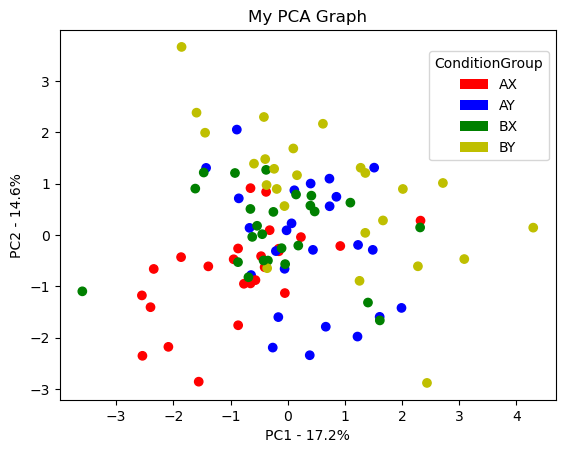

In [210]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(pca_df.PC1, pca_df.PC2, c=colors)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='ConditionGroup',
           bbox_to_anchor=(0.9, 0.85), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

In [213]:
genes = list(deseq2_norm(dds.to_df())[0])

In [214]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene10    0.387309
gene9     0.379995
gene5     0.369794
gene3    -0.368882
gene1     0.362584
gene4    -0.353063
gene2    -0.282774
gene8     0.240080
gene7    -0.196668
gene6     0.019373
dtype: float64
